## Modeling - Method and Techniques

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_circles
import pandas as pd
import ipywidgets as widgets
import plotly_express as px

## Datasets - Signal vs Noise

In every dataset, there's the true underlying pattern, which can be simple or very complex, and noise stemming from errors, measurment issues, anomalies, hidden variables etc. The stronger the pattern is in comparsion to the noise (AKA Signal to Noise ratio), the easier it will be to get good error rates on a test set.  

For example:

In [3]:
def make_circles_dataframe(n_samples, noise_level):
    points, label = make_circles(n_samples=n_samples, noise=noise_level)
    circles_df = pd.DataFrame(points, columns=['x','y'])
    circles_df['label'] = label
    circles_df.label = circles_df.label.map({0:'A', 1:'B'})
    return circles_df

In [4]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.149905,-0.785830,B
1,0.554923,0.576247,B
2,-0.837528,0.546394,A
3,0.569229,-0.562120,B
4,-0.999684,-0.025130,A


In [5]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Models capacity

Models capacity, models variance and models VC dimension are different terms for a models ability to fit itself to the data. Models with high capacity can fit data of seperate classes with minimal to no errors (think 1NN) by creating highly complex decision boundries or fitting patterns. Models with low capacity fit very simple and limited functions as decision boundries/fitting functions. **A linear classifier, for example, is the lowest capacity classifier.**. 

Low capacity classifiers cannot fit to the varialbility in the data, and thus deviates significantly from the optimal error rate achievable. They have **High bias**. On the bright side, low capacity models create very consistent results and are much less sensitive to the amount of data or the specific random training examples. This makes them yield a very consistent test set results, thus, having a **Low variance**.  

High capacity classifiers can fit to the varialbility in the data, both of **the pattern** AND **the noise**, and thus can fit to the pattern in the data perfectly, in theory able to achieve the optimal error rate. They have **Low bias**. On the other, darker side, high capacity models may create very inconsistent results by fitting not only to the complex pattern, but also to the noise. They are very sensitive to the amount of data or the specific random training examples. This makes them prone to inconsistent test set results **If not restrained correctly**,  thus, having a **High variance**.  

To "restrain" a high variance model, we can:
* Penelize it for being too complex (AKA regularization)
* High capacity models have parameters (AKA **Hyper parameters**) that control their allowed complexity, e.g. K in KNNs, or min_samples_split in Random Forest. 
* Boosting, Bagging, Dropouts Etc. 

### Increasing Linear models capacity

Linear models capacity can be increased by modifying the inputs. This is called "input space expension" or "feature augmentation". Common methods to expend the input space is to include input squares (or higher polynomials), input logarithms, cross input product etc. 

The model is still a linear combination of its input, but now the inputs represt more complex patterns, so more complex patterns can be fitted.

<span style='background :yellow' > Use a noise free circles data from above and fit it with a linear classifier. What is the accuracy? Now, add to the features the squares of each feature and re-fit the linear model, what is the accuracy this time?</span>

**Hint**

In [6]:
circles_df['x_squered'] = circles_df.x * circles_df.x
circles_df['y_squered'] = circles_df.y * circles_df.y
circles_df['xy'] = circles_df.x * circles_df.y

In [7]:
circles_df[['x','x_squered','y','y_squered','xy','label']].head()

,x,x_squered,y,y_squered,xy,label
0,0.149905,0.022472,-0.785830,0.617528,-0.117800,B
1,0.554923,0.307939,0.576247,0.332061,0.319773,B
2,-0.837528,0.701453,0.546394,0.298547,-0.457621,A
3,0.569229,0.324021,-0.562120,0.315979,-0.319975,B
4,-0.999684,0.999368,-0.025130,0.000632,0.025122,A


## The goal of Modeling

**_The goal in fitting a model to a dataset is to identify the pattern, no matter how complex it is, and avoid fitting the noise, i.e. AVOID OVERFITTING_**

### Overfitting

What is overfitting?

* Theoretically - The tendency of a model to fit to the noise in the data, as well or without fitting the true patterns in the data
* Empirically - When a model performs very well for training data but has poor performance with test data. 

**Occam's razor** - "entities should not be multiplied beyond necessity" - If two theories give similar results, the simple one should be preferred.

<img src="https://www.researchgate.net/publication/349186066/figure/fig1/AS:989978611953666@1613040702298/Example-of-overfitting-in-classification-a-Decision-boundary-that-best-fits-training.png" style="margin:auto"/>

<span style='background :yellow' > Question - what type of classification problem is depicted above? What is the difference between the two decision boundries?: </span>

### Bias, Variance and Overfitting

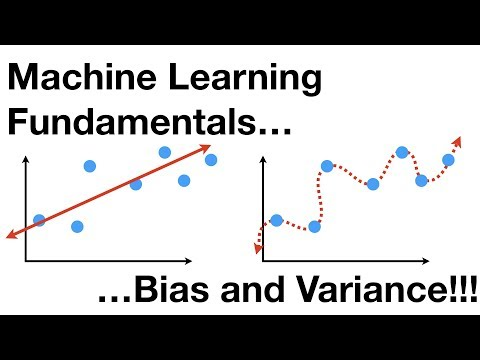

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo('EuBBz3bI-aA')

### Modeling methodoligy - HPS + CV

Again, our goal is to fit the model to the pattern with minimal fit to the noise. The method will be to fit increasing capacity models and evaluate them on a left aside set (validation/test set). The model capacity can be tuned (increased or decreased) using either the model's **hyper parameters** or decreased using regularization techniques. 
This is basically a search procedure,  will answer two questions:

1. What are the best model hyper-parameters.
1. What is the minimal achievable error with the selected model.

Therefore, for best results, it is best to use a model and model params with wery high fitting capacity.

**Note:** 

* The process of finding the optimal model hyper parameters is called **Hyper paramter tuning** or **Hyper paramter search** or **HPS**
* The process of training on a subset and testing on another subset is called **Cross validation** or **CV**

### Cross validation techniques

#### Leave-One-Out Cross-Validation (LOOCV)

LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set:

1. Split a dataset into a training set and a testing set, using all but one observation as part of the training set
1. Build the model using only data from the training set.
1. Use the model to predict the response value of the one observation left out of the model and calculate the MSE.
1. Repeat for every observation in the dataset

Pros:
1. Provides a much less biased measure of test metric since we are making full use of the dataset for the training part. 
1. It tends not to overestimate the test metric compared to using a single test set.

Cons:

1. Can be a time-consuming process to use when n is large.
1. Can also be time-consuming if a model is particularly complex and takes a long time to fit to a dataset.
1. Can be computationally expensive.
1. Does not fit time-serious datasets - Examples from the future will be used to predict values from the past

Python Code:

In [9]:
from src.datasets import load_2d_iris
X, Y = load_2d_iris()

In [11]:
from sklearn.model_selection import LeavePOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
lpo=LeavePOut(p=1)
lpo.get_n_splits(X)
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=lpo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0.]
Average Cross Validation score :0.64


#### HoldOut Cross-validation or Train-Test Split

In this technique of cross-validation, the whole dataset is randomly partitioned into a training set and validation set. Using a rule of thumb nearly 70% of the whole dataset is used as a training set and the remaining 30% is used as the validation set.

![alt](https://editor.analyticsvidhya.com/uploads/18265Screenshot-from-2020-10-06-16-35-50-768x432.png)

Pros:

1. Quick To Execute: As we have to split the dataset into training and validation set just once and the model will be built just once on the training set so gets executed quickly.

Cons:

1. Less Suitable for an imbalanced dataset: Suppose we have an imbalanced dataset that has class ‘0’ and class ‘1’. Let’s say 90% of data belongs to class ‘0’ and the remaining 10% data to class ‘1’.
On doing train-test split with train set size as 80% and test data size as 20% of the dataset. It may happen that all 80% data of class ‘0’ may be in the training set and all data of class ‘1’ in the test set. This is not likely (as we should sample randomaly) but can happen.

2. A large chunk of data gets deprived of training the model. In the case of a small dataset, a part will be kept aside for testing the model which may have important characteristics which our model may miss out on as it has not trained on that data.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Accuracy score on training set is 0.7428571428571429
Accuracy score on test set is 0.7333333333333333


#### K-Fold Cross-Validation

In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“, So as we have K parts we call it K-Folds. One Fold is used as a validation set and the remaining K-1 folds are used as the training set.
The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.

The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data, and from the k metrics we can also compute the model variance.

![alt](https://editor.analyticsvidhya.com/uploads/16042grid_search_cross_validation.png)

Pros:

1. The whole dataset is used as both a training set and validation set
1. We can get a sense of both the model accuracy and variance 

Cons:

1. Care should be taken if used with imbalanced datasets,  As discussed in the case of HoldOut cross-validation.

2. Not suitable for Time Series data: For Time Series data the order of the samples matter. But in K-Fold Cross-Validation, samples are selected in random order.

 

Python code:

In [13]:
from sklearn.model_selection import KFold
logreg=LogisticRegression(max_iter = 1000)
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("STD of Cross Validation score :{}".format(score.std()))

Cross Validation Scores are [0.55 0.35 0.9  0.55 0.45]
Average Cross Validation score :0.56
STD of Cross Validation score :0.1854723699099141


### Stratified K-Fold Cross-Validation

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.

But in this technique, each fold will have the same ratio of instances of target variable as in the whole datasets.

![alt](https://i.stack.imgur.com/B9CCp.png)

Pros:

1. Works perfectly well for Imbalanced Data: Each fold in stratified cross-validation will have a representation of data of all classes in the same ratio as in the whole dataset.

Cons:

1. Not suitable for Time Series data: For Time Series data the order of the samples matter. But in Stratified Cross-Validation, samples are selected in random order.

Python code:

In [14]:
from sklearn.model_selection import StratifiedKFold
logreg=LogisticRegression(max_iter=1000)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print("STD of Cross Validation score :{}".format(score.std()))

Cross Validation Scores are [0.6  0.8  0.6  0.85 0.85]
Average Cross Validation score :0.74
STD of Cross Validation score :0.11575836902790225


### Hyper parameter search

basically, we will create a grid of potential model hyper parameters, from parameters yielding low capacity model to parameters yielding high capacity model and also a grid of regularization magnitudes.
We will split the set to a training set and validation set, train a series of models corresponding to all combination of parameters and evaluate the parametrs goodness on the validation set.

#### Example - SVM with RBF kernel

For example, Radial Basis Function (RBF) kernel SVM has two hyper parameters: gamma and C. Intuitively:
* The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
  * For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
  * A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
  * In other words **C behaves as a regularization parameter in the SVM.**

In [23]:
from sklearn.svm import SVC

In [58]:
circles_df = make_circles_dataframe(10000, noise_level=0.1)

In [ ]:
circles_df.head(n_samples)

In [45]:
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
k_folds = 10
result = []
n_samples = [5,10,50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4]
clf_types = ['log_reg', 'knn']
for nl in noise_levels:
    for n_samples in n_samples:
        df = circles_df.head(n_samples)
        for k in range(k_folds):
            x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=k)
            for param in hyper_params:
                for clf_type in clf_types:
                    clf = init_clf(clf_type, param)
                    clf.fit(x_train, y_train)
                    y_test_pred = clf.predict(x_test)
                    result.append((C, gamma, k, accuracy_score(y_test, y_test_pred)))

In [46]:
results = pd.DataFrame(classifiers, columns = ['C','gamma','k','acc'])
results

,C,gamma,k,acc
0,0.01,0.1,0,0.600000
1,0.01,1.0,0,0.533333
2,0.01,10.0,0,0.500000
3,1.00,0.1,0,0.566667
4,1.00,1.0,0,0.600000
...,...,...,...,...
85,1.00,1.0,9,0.766667
86,1.00,10.0,9,0.600000
87,100.00,0.1,9,0.666667
88,100.00,1.0,9,0.600000


In [49]:
results.groupby(['C', 'gamma']).acc.agg(['mean', 'std','max'])

mean       std       max
C      gamma                              
0.01   0.1    0.453333  0.057090  0.600000
       1.0    0.446667  0.039126  0.533333
       10.0   0.443333  0.031623  0.500000
1.00   0.1    0.690000  0.125757  0.966667
       1.0    0.656667  0.081725  0.833333
       10.0   0.593333  0.075031  0.733333
100.00 0.1    0.666667  0.078567  0.866667
       1.0    0.586667  0.074037  0.733333
       10.0   0.563333  0.074453  0.733333

In [44]:
results.pivot_table(values = 'acc', index='C', columns='gamma', aggfunc='mean')

gamma,0.1,1.0,10.0
C,,,
0.01,0.433333,0.433333,0.433333
1.00,0.600000,0.666667,0.566667
100.00,0.700000,0.633333,0.533333


### Regularization

Regularization is Loss function adjustments to inforce small/zero weights. The two most popular regularization additions are:
* Ridge regression - $Loss = Error(y,\bar{y}) + \lambda \sum_{i=1}^{n}{w_i}^2$
* Lasso regression - $Loss = Error(y,\bar{y}) + \lambda \sum_{i=1}^{n}{|{w_i}|}$

The intuition is that making sure none of the model params gets too big restrain the model capacity of fitting complicated decision boundries. The model is penelized  

#### Ridge regression

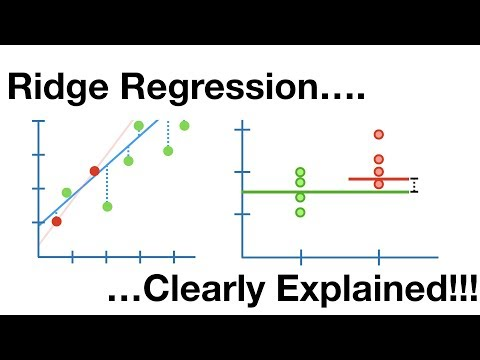

In [29]:
from IPython.display import YouTubeVideo

YouTubeVideo('Q81RR3yKn30')

#### Lasso regression

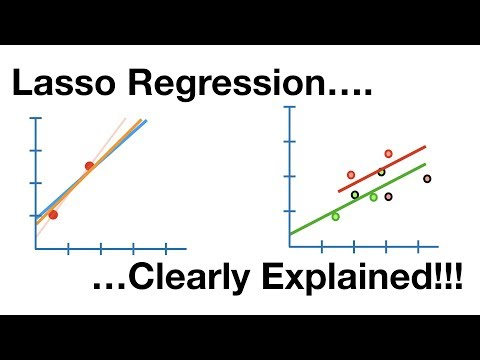

In [30]:
from IPython.display import YouTubeVideo

YouTubeVideo('NGf0voTMlcs')